In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sb

In [ ]:
columns=[
        'duration',
'protocol_type', 
'service' , 
'flag' ,
 'src_bytes' ,
 'dst_bytes',
'land',
'wrong_fragment',
 'urgent' ,
'hot',
'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell' ,
 'su_attempted' ,
 'num_root' ,
 'num_file_creations' ,
 'num_shells' ,
 'num_access_files',
'num_outbound_cmds' ,
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count' ,
 'serror_rate' ,
 'srv_serror_rate' ,
 'rerror_rate' ,
 'srv_rerror_rate' ,
 'same_srv_rate' ,
 'diff_srv_rate' ,
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count' ,
 'dst_host_same_srv_rate' ,
 'dst_host_diff_srv_rate' ,
 'dst_host_same_src_port_rate' ,
 'dst_host_srv_diff_host_rate' ,
 'dst_host_serror_rate' ,
 'dst_host_srv_serror_rate' ,
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate' ,
 'class'
]

In [ ]:
len(columns)

42

In [ ]:
def Standardization(X_original):
  from sklearn.preprocessing import StandardScaler
  scaler1 = StandardScaler().fit(X)
  X_original=scaler1.transform(X)
  return X_original

In [ ]:
data=pd.read_csv("KDD Train+ Unwanted removed.txt")

In [ ]:
data.columns=columns

In [ ]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal
1,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,anomaly
2,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal
3,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,anomaly


In [ ]:
data.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,anomaly
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,anomaly
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [ ]:
data['duration'].count()

125972

In [ ]:
data['class'].value_counts()

normal     67342
anomaly    58630
Name: class, dtype: int64

In [ ]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
for i in columns:
  if type(data[i][0])==type(data['protocol_type'][0]):
    print(i+" column has "+str(data[i].nunique())+" unique features")

protocol_type column has 3 unique features
service column has 70 unique features
flag column has 11 unique features
class column has 2 unique features


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cat_col=['protocol_type','service','flag','class']
new_categorical_columns=data[cat_col]
new_categorical_columns.head()

,protocol_type,service,flag,class
0,udp,other,SF,normal
1,tcp,private,S0,anomaly
2,tcp,http,SF,normal
3,tcp,http,SF,normal
4,tcp,private,REJ,anomaly


In [ ]:
new_cat_encoded=new_categorical_columns.apply(LabelEncoder().fit_transform)

In [ ]:
new_cat_encoded.head()

,protocol_type,service,flag,class
0,2,44,9,1
1,1,49,5,0
2,1,24,9,1
3,1,24,9,1
4,1,49,1,0


In [ ]:
data=data.drop(['flag','protocol_type','service'],axis=1)

In [ ]:
data=data.drop('class',axis=1)

In [ ]:
data=data.join(new_cat_encoded)

In [ ]:
data = data.reindex(columns, axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,2,44,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,1
1,0,1,49,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,0
2,0,1,24,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,1
3,0,1,24,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,1
4,0,1,49,1,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,0


In [ ]:
X = data.drop('class',1)
Y = data['class']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
Y_original=Y.values

In [ ]:
Y_original

array([1, 0, 1, ..., 1, 0, 1])

Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

Example: If an algorithm is not using the feature scaling method then it can consider the value 3000 meters to be greater than 5 km but that’s actually not true and in this case, the algorithm will give wrong predictions. So, we use Feature Scaling to bring all values to the same magnitudes and thus, tackle this issue.

Techniques to perform Feature Scaling
Consider the two most important ones:

Min-Max Normalization: This technique re-scales a feature or observation value with distribution value between 0 and 1.
X_{\text {new }}=\frac{X_{i}-\min (X)}{\max (x)-\min (X)}

Standardization: It is a very effective technique which re-scales a feature value so that it has distribution with 0 mean value and variance equals to 1.

X_{\text {new }}=\frac{X_{i}-X_{\text {mean }}}{\text { Standard Deviation }}


PLOTTING TO SEE HOW MANY NORMAL AND ANAMOLY TRAFFIC EXISTS, NORMAL 1,ANAMOLY 0

In [ ]:
X

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,2,44,9,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
1,0,1,49,5,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
2,0,1,24,9,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
3,0,1,24,9,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0,1,49,1,0,0,0,0,0,0,...,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00
125968,8,2,49,9,105,145,0,0,0,0,...,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00
125969,0,1,54,9,2231,384,0,0,0,0,...,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00
125970,0,1,30,5,0,0,0,0,0,0,...,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00


In [ ]:
X = data.drop(['land','urgent','num_failed_logins','root_shell','su_attempted','num_root' ,'num_shells',
'num_access_files','num_outbound_cmds','is_host_login','serror_rate','srv_rerror_rate'],1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
len(X.columns)

30

In [ ]:
X_original=Standardization(X)

Y_original is the true Y to be predicted

In [ ]:
import pickle
filename='/content/kmeans_cluster.pkl'
infile = open(filename,'rb')
kmeans = pickle.load(infile)
Y_train_new=kmeans.predict(X_original)

In [ ]:
!pip install  keras

In [ ]:
import os
import cv2
import keras
import tensorflow
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU


from keras.models import model_from_json

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization

In [ ]:
len(X_original[0])

30

In [ ]:
Y_train_new = to_categorical(Y_train_new)

In [ ]:
Y_train_new

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

Converting Data into images of 5X6

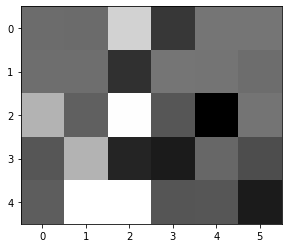

In [ ]:
import matplotlib.pyplot as plt
array=np.reshape(X_original[5]*255, (5,6))
plt.imshow(array,cmap='gray')

In [ ]:
def convertToImage(X_original):
  x=list()
  count=0
  for i in X_original:
    array = np.reshape(i, (5,6))
    print(count)
    count+=1
    img=np.reshape(array,(array.shape[0],array.shape[1],1))
    x.append(img)
  X=np.array(x)
  return X


In [ ]:
X_images=convertToImage(X_original)

In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Input(shape=(5,6,1)))
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 3, 4, 25)          250       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 4, 25)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 30,754
Trainable params: 30,754
Non-trainable params: 0
__________________________________________________

In [ ]:
m_train=model.fit(X_images,Y_train_new,batch_size=64,verbose=1,epochs=40)

1969/1969 [==============================] - 8s 4ms/step - loss: 2.8105e-04 - accuracy: 0.9993
Epoch 40/40
1969/1969 [==============================] - 8s 4ms/step - loss: 2.2990e-04 - accuracy: 0.9995


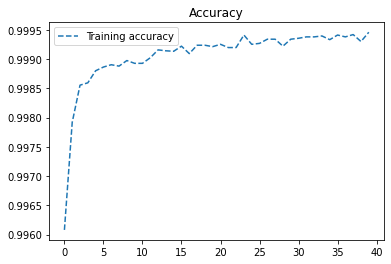

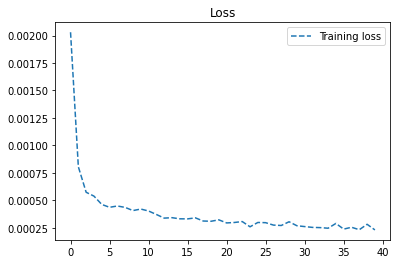

In [ ]:
accuracy=m_train.history['accuracy']
#val_accuracy=m_train.history['val_accuracy']
loss=m_train.history['loss']
#val_loss=m_train.history['val_loss']
epochs=range(len(loss))
plt.figure()
#plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.plot(epochs,accuracy,'--',label='Training accuracy')
#plt.plot(epochs,val_accuracy,'b',label='Validation accuracy')
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'--',label='Training loss')
#plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
CNN_json = model.to_json()
with open("/content/CNN_kmeans.json", "w") as json_file:
  json_file.write(CNN_json)
# serialize weights to HDF5
model.save_weights("CNN_kmeans.h5")
print("Saved model to disk")


Saved model to disk
